# Stocks Price Prediction With GPR

In [255]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, DotProduct, RBF, Matern, RationalQuadratic, ExpSineSquared
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import quandl
from sklearn import preprocessing

In [ ]:
# Get data via Quandl API
data = quandl.get('WIKI/NVDA')
np.random.seed(seed=0)  # Set seed for NumPy
random_state = 0

## Preprocess Data

In [323]:
y = np.array(data.Open[:1000]).reshape(-1,1)
x = np.arange(len(y)).reshape(-1,1)
scaler = preprocessing.StandardScaler().fit(y)
y = scaler.transform(y)


## Create kernel and define GPR

In [324]:
kernel = 0.2*RBF(1.5) + 3*RBF(0.3) + WhiteKernel(noise_level=1e-3) + Matern() + RationalQuadratic()*0.1 + ExpSineSquared()*0.2
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

## Fit GPR model and Predict

In [325]:
gpr.fit(x, y)
x_new = np.arange(0, len(x)+100).reshape(-1,1)
y_hat, y_sigma = gpr.predict(x_new, return_std=True)

## Plot Data

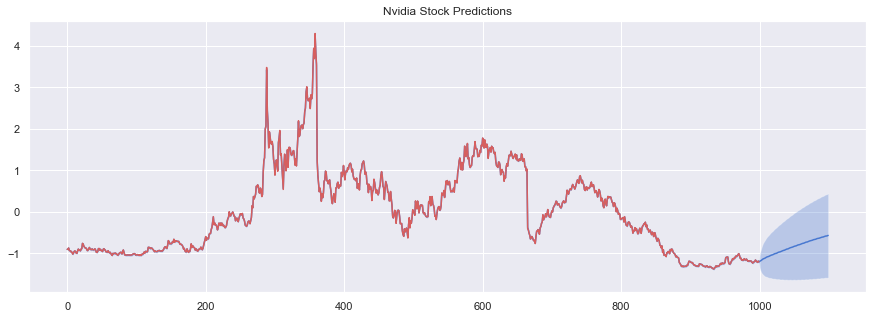

In [326]:
sns.set(style="darkgrid", palette="muted", color_codes=True)
# Initialize plot
f, ax = plt.subplots(1, 1, figsize=(15, 5))
# plot predict data
y_hat = np.squeeze(y_hat)
ax.plot(x_new, y_hat, 'b')
lower = y_hat - y_sigma
upper = y_hat + y_sigma
ax.fill_between(x_new.flatten(), lower, upper, alpha=0.3)
# plot original data
ax.plot(x, y, 'r')
plt.title("Nvidia Stock Predictions")
plt.show()